# EYE FOR BLIND

This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
import os
for dirpath, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

/kaggle/input/flickr8k/captions.txt
/kaggle/input/flickr8k/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flickr8k/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flickr8k/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flickr8k/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flickr8k/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flickr8k/Images/2752809449_632cd991b3.jpg
/kaggle/input/flickr8k/Images/3097776588_312932e438.jpg
/kaggle/input/flickr8k/Images/1206506157_c7956accd5.jpg
/kaggle/input/flickr8k/Images/1319634306_816f21677f.jpg
/kaggle/input/flickr8k/Images/2465218087_fca77998c6.jpg
/kaggle/input/flickr8k/Images/3351493005_6e5030f596.jpg
/kaggle/input/flickr8k/Images/2949337912_beba55698b.jpg
/kaggle/input/flickr8k/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flickr8k/Images/3543600125_223747ef4c.jpg
/kaggle/input/flickr8k/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flickr8k/Images/280706862_14c30d734a.jpg
/kaggle/input/flickr8k/Images/2100735137_05c6079537.jpg
/kaggle/input/f

In [2]:
#Import all the required libraries

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import random as rn
import string
from collections import Counter
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.text import Tokenizer
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers

import warnings
warnings.filterwarnings("ignore")

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions

In [3]:
#Import the dataset and read the image into a seperate variable

images='/kaggle/input/flickr8k/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


Image and Text for image id:  2102581664_5ea50f85c6.jpg


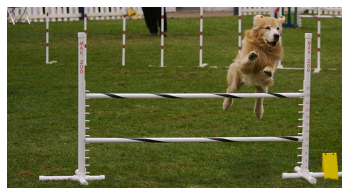

['A brown dog jumps over a barrier that is black and white .'
 'A dog jumping high to clear the bars .' 'a dog jumps over the pole .'
 'Orange dog jumps over striped posts on course .'
 'The brown dog is performing a jump in an obstacle course .'] 


Image and Text for image id:  2158247955_484f0a1f11.jpg


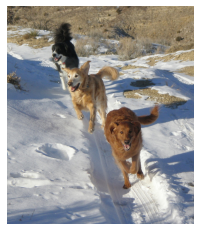

['The three dogs are running down a snowy track .'
 'Three dogs are running across snow with a tire track in it .'
 'Three dogs are turning direction along a snow tread leading from a low cut field .'
 'Three dogs run in the snow .'
 'Three dogs running on tire tracks in snow .'] 


Image and Text for image id:  207584893_63e73c5c28.jpg


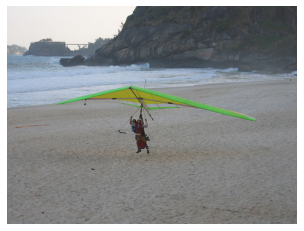

['A person in a hang-glider .'
 'A person on a beach in a green hang glider .' 'A small parasail .'
 'Hang glider on beach'
 'Two parasailors on one parasail landing on a sandy beach in front of a large rocky boulder and the water .'] 


Image and Text for image id:  111766423_4522d36e56.jpg


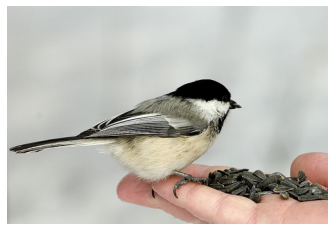

["A black and white bird eating seeds out of someone 's hand"
 'A black and white bird standing on a hand .'
 "A small bird sits in a person 's hand and eats seeds ."
 'Black and white bird standing on hand of someone holding sunflower seeds'
 'The small bird is clinging to a finger of the hand holding the seeds .'] 


Image and Text for image id:  222369445_5b6af347dd.jpg


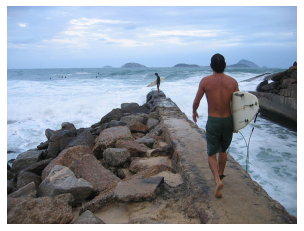

['A man is carrying a surfboard along a stone wall that leads to the ocean .'
 'Man in green swim trunks carrying a surfboard along a rock wall to the ocean .'
 'Surfers walking along a seawall as the ocean churns around them .'
 'Two surfers carry their boards to the end of a walkway to join the others in the water .'
 'Two surfers walk along a rock wall to reach the waves .'] 




In [4]:
#Visualise both the images & text present in the dataset

text_file = '/kaggle/input/flickr8k/captions.txt'
text_df = pd.read_csv(text_file)
text_df.head(5)

for i in range(5) : 
    # visualising image
    random_index = rn.randint(0,len(all_imgs))
    image_id = text_df.loc[random_index,'image']
    print('Image and Text for image id: ',image_id)
    image = plt.imread(images + '/' + image_id)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # visualising texts
    print(text_df.loc[text_df['image'] == image_id,'caption'].values, '\n\n')

In [5]:
#Import the dataset and read the text file into a seperate variable

text_file = '/kaggle/input/flickr8k/captions.txt'
def load_doc(filename):
    
    open_file = open(filename, 'r')
    text = open_file.read()
    open_file.close()
    
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [6]:
#store all the image id here
all_img_id=text_df['image'].values
#store all the image path here
all_img_vector= images + '/' + text_df['image']
#store all the captions here
annotations= text_df['caption'].values

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/kaggle/input/flickr8k/Images/1000268201_693b0...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/kaggle/input/flickr8k/Images/1000268201_693b0...,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,/kaggle/input/flickr8k/Images/1000268201_693b0...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,/kaggle/input/flickr8k/Images/1000268201_693b0...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/kaggle/input/flickr8k/Images/1000268201_693b0...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,/kaggle/input/flickr8k/Images/997722733_0cb543...,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,/kaggle/input/flickr8k/Images/997722733_0cb543...,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,/kaggle/input/flickr8k/Images/997722733_0cb543...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,/kaggle/input/flickr8k/Images/997722733_0cb543...,A rock climber in a red shirt .


In [7]:
#Create a list which contains all the captions
#add the <start> & <end> token to all those captions as well

## will apply start and end tags later
annotations = df['Captions'].tolist()
print(annotations[:10])

#Create a list which contains all the path to the images
all_img_path = all_imgs

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .', 'A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']
Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [8]:
#Create the vocabulary & the counter for the captions
#removing punctuations and converting the words to lower case

no_punct = [''.join(letter for letter in word if letter not in string.punctuation) for word in annotations]
vocabulary= [word.lower() for line in no_punct for word in line.split()]

val_count=Counter(vocabulary)
val_count

Counter({'a': 62986,
         'child': 1545,
         'in': 18974,
         'pink': 735,
         'dress': 348,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6713,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 50,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18418,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'and': 8851,
         'spotted': 37,
         'are': 3504,
         'fighting': 132,
         'tricolored': 14,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10743,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         'staring': 57,
         'at': 2914,
         'street

In [9]:
#add the <start> & <end> token to all those captions as well

annotations = df['Captions'].apply(lambda x : '<start> '+ x + ' <end>').tolist()
annotations[:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

[('a', 62986), ('in', 18974), ('the', 18418), ('on', 10743), ('is', 9345), ('and', 8851), ('dog', 8136), ('with', 7765), ('man', 7265), ('of', 6713), ('two', 5638), ('white', 3940), ('black', 3832), ('boy', 3581), ('are', 3504), ('woman', 3402), ('girl', 3328), ('to', 3173), ('wearing', 3062), ('at', 2914), ('people', 2883), ('water', 2783), ('red', 2672), ('young', 2630), ('brown', 2563), ('an', 2432), ('his', 2357), ('blue', 2268), ('dogs', 2125), ('running', 2073)]


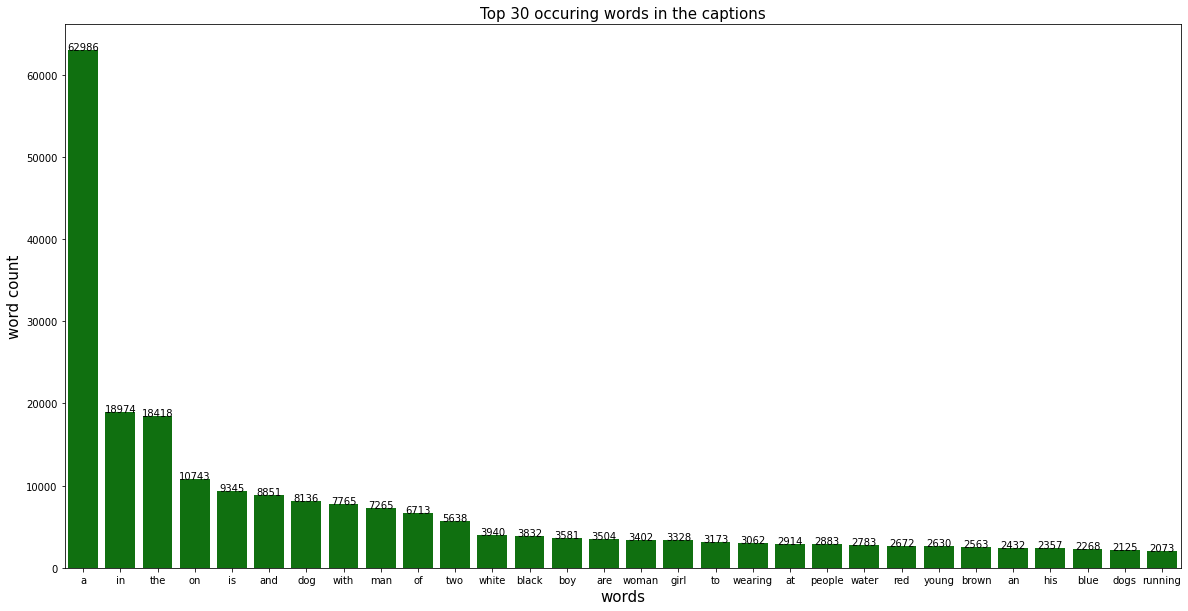

In [10]:
#Visualise the top 30 occuring words in the captions
top_30_words = val_count.most_common(30)
print(top_30_words)

word = []
count = []
for i in top_30_words:
    word.append(i[0])
    count.append(i[1])

#plotting top 30 occuring words
plt.figure(figsize=(20,10))
plt.title('Top 30 occuring words in the captions', fontsize=15)
plt.xlabel('words', fontsize = 15)
plt.ylabel('word count', fontsize = 15)
plot = sns.barplot(x=word, y=count, color = 'green')
for p in plot.patches:
    plot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center')
plt.show()

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [11]:
# create the tokenizer

top_vocab = 5000
special_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
tokenizer = Tokenizer(num_words=top_vocab,
                      lower = True, 
                      split = " ", 
                      char_level = False,
                      oov_token="<unk>",
                      filters=special_chars)

#fit the tokenizer on words in dataset
tokenizer.fit_on_texts(annotations)

# Converting each text in texts to a sequence of integers.
text_sequences = tokenizer.texts_to_sequences(annotations)
text_sequences[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [12]:
# Create word-to-index and index-to-word mappings.

word2index = tokenizer.word_index
index2word = tokenizer.index_word

print('Index for the word ',"a is", word2index["a"])
print('Word for the index : 5 is ', index2word[5])

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'


Index for the word  a is 2
Word for the index : 5 is  in


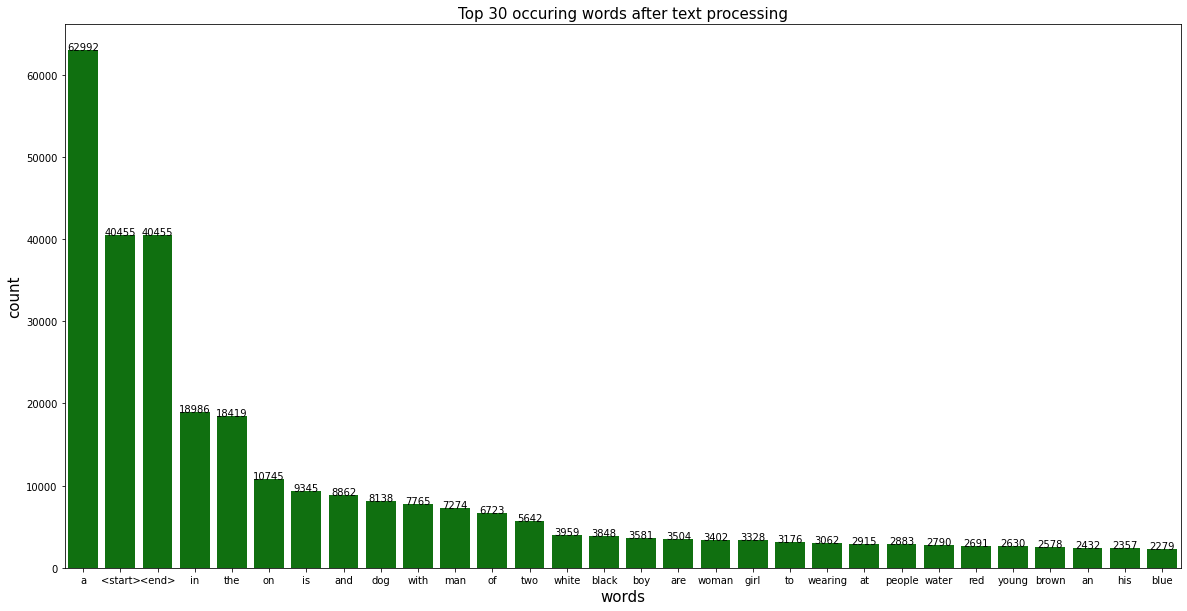

In [13]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

word_counts = tokenizer.word_counts
df_word_counts = pd.DataFrame.from_dict(word_counts, orient = 'index',columns=['count'])

top_30 = df_word_counts.sort_values(by='count', ascending=False)[:30]

#plotting top 30 occuring words
plt.figure(figsize=(20,10))
plt.title('Top 30 occuring words after text processing', fontsize=15)
plt.xlabel('words', fontsize = 15)
plt.ylabel('word count', fontsize = 15)
plot = sns.barplot(x=top_30.index, y=top_30['count'], color = 'green')
for p in plot.patches:
    plot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center')
plt.show()

In [14]:
#finding max length of caption
max_len = max([len(text) for text in text_sequences])
print("shape of caption vector: ", len(text_sequences))
print("Maximum length of sequence: ",max_len)

shape of caption vector:  40455
Maximum length of sequence:  39


In [15]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector=tf.keras.preprocessing.sequence.pad_sequences(text_sequences,padding='post',maxlen=max_len)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 39)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.

In [16]:
#write your code here to create the dataset consisting of image paths

#sorting and storing the unique paths in a list
unique_img_path = sorted(set(all_img_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_path)

In [17]:
#checking image data format
tf.keras.backend.image_data_format() 

'channels_last'

image data format 'channel_last' indicates the images are in 3D array where the third dimention is color channel

In [18]:
#write your code here for creating the function. This function should return images & their path
IMAGE_SHAPE = (299, 299)
def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [19]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)
image_dataset

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)

In [20]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

#write code here to get the input of the image_model
new_input = image_model.input 
#write code here to get the output of the image_model
hidden_layer = image_model.layers[-1].output 

#build the final model using both input & output layer
image_features_extract_model = keras.Model(new_input, hidden_layer) 

87924736/87910968 [==============================] - 0s 0us/step


In [21]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [22]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
feature_dict = {}

for image,path in tqdm(image_dataset):
    batch_features = image_features_extract_model(image)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for batch_f, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()

100%|██████████| 253/253 [00:59<00:00,  4.29it/s]


In [23]:
batch_f.shape

TensorShape([64, 2048])

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)

In [24]:
#write your code here
path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,
                                                                        cap_vector,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [25]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [26]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image_name,caption):
    # write your code here to extract the features from the dictionary stored earlier
    image_tensor = feature_dict[image_name.decode('utf-8')]
    return image_tensor,caption

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [27]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BATCH_SIZE = 32
BUFFER_SIZE = 1000
def gen_dataset(images_data, captions_data):
    
    # your code goes here to create the dataset & transform it
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [28]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [29]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(32, 64, 2048)
(32, 39)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [30]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images)
test_num_steps = len(path_test) // BATCH_SIZE #len(total test images)

print('number of training steps: ', train_num_steps)
print('number of test steps: ', test_num_steps)

number of training steps:  1011
number of test steps:  252


### Encoder

In [31]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        #build your Dense layer with relu activation
        self.dense = tf.keras.layers.Dense(embed_dim , activation='relu')
        
    def call(self, features):
        # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  self.dense(features)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [32]:
encoder=Encoder(embedding_dim)

### Attention model

In [33]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)
        # build your score funciton to shape: (batch_size, 8*8, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        # extract your attention weights with shape: (batch_size, 8*8, 1)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)
        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features
        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)
        

        return context_vector, attention_weights

### Decoder

In [34]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        #initalise your Attention model with units
        self.attention = Attention_model(self.units)
        #build your Embedding layer
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)  #build your Dense layer 

    def call(self,x,features, hidden):
        #create your context vector & attention weights from attention model
        context_vector, attention_weights = self.attention(features, hidden)
        # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  self.embed(x)
        # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1)
        # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output,state = self.gru(embed)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [35]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [36]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) 
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) 
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape))

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [37]:
#define the optimizer
optimizer = tf.keras.optimizers.Adam()
#define your loss object
loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [38]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

In [39]:
checkpoint_path = "flickr8k/checkpoint/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt,
                                          checkpoint_path,
                                          max_to_keep=5)

In [40]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [41]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #training steps  
        # Encoder
        features = encoder(img_tensor)
        # using Teacher forcing is a technique where the target/real word is passed as the next input to the decoder
        for i in range(1, target.shape[1]):
            # passing encoder output to the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        
        # backpropagation
        #calculating average loss for every batch  
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        
        #calculating gradients with respect to every trainable variable
        gradients = tape.gradient(loss, trainable_variables)
        #applying it to the optimizer and backpropagating.
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
        return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [42]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    #write your code here to do the testing steps
    with tf.GradientTape() as tape:
        # Encoder
        features = encoder(img_tensor)
       
        # using Teacher forcing is a technique where the target/real word is passed as the next input to the decoder
        for i in range(1, target.shape[1]):
            # passing encoder output to the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        
        #calculating average loss for every batch
        avg_loss = (loss / int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        
        #calculating gradients with respect to every trainable variable
        gradients = tape.gradient(loss, trainable_variables)
        #applying it to the optimizer and backpropagating.
        optimizer.apply_gradients(zip(gradients, trainable_variables))

        return loss, avg_loss

In [43]:
def test_loss_cal(test_dataset):
    total_loss = 0
    
    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    
    return avg_test_loss

In [44]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.188, & test loss is 1.010
Time taken for 1 epoch 241.88333940505981 sec

Test loss has been reduced from 100.000 to 1.010


 13%|█▎        | 2/15 [05:59<36:34, 168.84s/it]

For epoch: 2, the train loss is 0.936, & test loss is 0.899
Time taken for 1 epoch 117.35558247566223 sec

Test loss has been reduced from 1.010 to 0.899


 20%|██        | 3/15 [07:57<29:04, 145.38s/it]

For epoch: 3, the train loss is 0.855, & test loss is 0.832
Time taken for 1 epoch 117.2924017906189 sec

Test loss has been reduced from 0.899 to 0.832


 27%|██▋       | 4/15 [09:54<24:37, 134.36s/it]

For epoch: 4, the train loss is 0.796, & test loss is 0.780
Time taken for 1 epoch 117.29111003875732 sec

Test loss has been reduced from 0.832 to 0.780


 33%|███▎      | 5/15 [11:52<21:22, 128.28s/it]

For epoch: 5, the train loss is 0.748, & test loss is 0.732
Time taken for 1 epoch 117.33256316184998 sec

Test loss has been reduced from 0.780 to 0.732


 40%|████      | 6/15 [13:49<18:41, 124.63s/it]

For epoch: 6, the train loss is 0.705, & test loss is 0.691
Time taken for 1 epoch 117.34552264213562 sec

Test loss has been reduced from 0.732 to 0.691


 47%|████▋     | 7/15 [15:47<16:18, 122.29s/it]

For epoch: 7, the train loss is 0.666, & test loss is 0.653
Time taken for 1 epoch 117.29385256767273 sec

Test loss has been reduced from 0.691 to 0.653
For epoch: 8, the train loss is 0.630, & test loss is 0.622
Time taken for 1 epoch 117.27877902984619 sec

Test loss has been reduced from 0.653 to 0.622


 60%|██████    | 9/15 [19:42<11:58, 119.78s/it]

For epoch: 9, the train loss is 0.597, & test loss is 0.588
Time taken for 1 epoch 117.41472029685974 sec

Test loss has been reduced from 0.622 to 0.588


 67%|██████▋   | 10/15 [21:39<09:54, 118.99s/it]

For epoch: 10, the train loss is 0.567, & test loss is 0.558
Time taken for 1 epoch 117.0612006187439 sec

Test loss has been reduced from 0.588 to 0.558


 73%|███████▎  | 11/15 [23:36<07:54, 118.53s/it]

For epoch: 11, the train loss is 0.540, & test loss is 0.531
Time taken for 1 epoch 117.29270815849304 sec

Test loss has been reduced from 0.558 to 0.531


 80%|████████  | 12/15 [25:34<05:54, 118.13s/it]

For epoch: 12, the train loss is 0.514, & test loss is 0.507
Time taken for 1 epoch 117.04258942604065 sec

Test loss has been reduced from 0.531 to 0.507


 87%|████████▋ | 13/15 [27:31<03:55, 117.90s/it]

For epoch: 13, the train loss is 0.491, & test loss is 0.484
Time taken for 1 epoch 117.18144154548645 sec

Test loss has been reduced from 0.507 to 0.484


 93%|█████████▎| 14/15 [29:28<01:57, 117.75s/it]

For epoch: 14, the train loss is 0.470, & test loss is 0.462
Time taken for 1 epoch 117.22760725021362 sec

Test loss has been reduced from 0.484 to 0.462


100%|██████████| 15/15 [31:26<00:00, 125.75s/it]

For epoch: 15, the train loss is 0.451, & test loss is 0.445
Time taken for 1 epoch 117.2129213809967 sec

Test loss has been reduced from 0.462 to 0.445


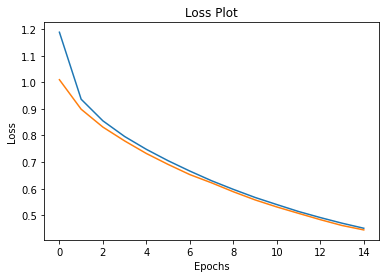

In [45]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [46]:
def evaluate(image):
    max_length=max_len
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        
        #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        predicted_id = tf.argmax(predictions[0]).numpy()     
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

### Beam Search(optional)

In [47]:
def beam_evaluate(image, beam_index = 3):
    #write your code to evaluate the result using beam search

    max_length=max_len
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [48]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [49]:
from nltk.translate.bleu_score import sentence_bleu

In [50]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [51]:
features_shape = batch_f.shape[1]
attention_features_shape = batch_f.shape[0]
print(features_shape)
print(attention_features_shape)

2048
64


In [52]:
rid = np.random.randint(0, len(path_test))
print(rid)
test_image = path_test[rid]

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)

real_caption=filt_text(real_caption) 

pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(f"BELU score: {score*100}")

print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

4470


KeyError: 4470

In [ ]:
captions=beam_evaluate(test_image)
print(pred_caption)

## Converting Text to Speech

In [ ]:
! pip install gTTS

In [ ]:
# converting text-to-speach 
from gtts import gTTS
from IPython import display

tts = gTTS(pred_caption, slow = False)
tts.save('pred_caption.mp3')

sound_file = 'pred_caption.mp3'
display.display(display.Audio(sound_file))